# Task 2 - Alkemy

_Lorenzo Antolini, Enrico Grandi, Simone Lu, Enrico Romano_

In [9]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

In [10]:
df_sd = pd.read_csv(r'C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\sales_data.csv')
# # df_cr = pd.read_csv('clicksreg_cleaned.csv')
df_pc = pd.read_csv(r'C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\product_catalog.csv')
# df_cb = pd.read_csv('clicks_bidding.csv')

In [11]:
df_sd

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price
0,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.70000
1,2021-01-03,157318,1,4590.0,12211.0,3825.0,10175.9259,3481.20000
2,2021-01-04,107645,3,1990.0,4433.0,1658.0,3694.4444,1369.29000
3,2021-01-04,110853,12,3990.0,8322.0,3325.0,6935.1852,2833.70000
4,2021-01-04,110908,1,4490.0,7767.0,3742.0,6472.2222,3722.00000
...,...,...,...,...,...,...,...,...
5767,2021-12-31,161147,1,3110.0,4443.0,2592.0,3702.7778,2400.00000
5768,2021-12-31,162101,2,24990.0,31100.0,20825.0,25916.6667,21249.99995
5769,2021-12-31,162102,7,26990.0,36656.0,22492.0,30546.2963,22500.00000
5770,2021-12-31,163385,4,59999.0,77777.0,49999.0,64813.8889,44633.58360


In [13]:
print(df_sd.columns)


Index(['sale_date', 'product_id', 'quantity', 'sales_price_tax',
       'regular_price_tax', 'sales_price', 'regular_price', 'purchase_price'],
      dtype='object')


In [15]:
# Assuming profit is calculated as (sales_price - purchase_price) * quantity
df_sd['profit'] = (df_sd['sales_price'] - df_sd['purchase_price']) * df_sd['quantity']

# Now you can use the 'profit' column
print(df_sd.head())


   sale_date  product_id  quantity  sales_price_tax  regular_price_tax  \
0 2021-01-02      110853         1           3990.0             8322.0   
1 2021-01-03      157318         1           4590.0            12211.0   
2 2021-01-04      107645         3           1990.0             4433.0   
3 2021-01-04      110853        12           3990.0             8322.0   
4 2021-01-04      110908         1           4490.0             7767.0   

   sales_price  regular_price  purchase_price   profit  
0       3325.0      6935.1852         2833.70   491.30  
1       3825.0     10175.9259         3481.20   343.80  
2       1658.0      3694.4444         1369.29   866.13  
3       3325.0      6935.1852         2833.70  5895.60  
4       3742.0      6472.2222         3722.00    20.00  


In [16]:
df_sd_1 = df_sd.copy()

# ABC analysis 
ABC analysis is an inventory management technique that determines the value of inventory items based on their importance to the business. ABC ranks items on demand, cost and risk data, and inventory mangers group items into classes based on those criteria. This helps business leaders understand which products or services are most critical to the financial success of their organization.
The most important stock keeping units (SKUs), based on either sales volume or profitability, are "Class A" items, the next-most important are Class B and the least important are Class C. Some companies may choose a classification system that breaks products into more than just those three groups (A-F, for example).

In [17]:
df_sd_1

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit
0,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.70000,491.3000
1,2021-01-03,157318,1,4590.0,12211.0,3825.0,10175.9259,3481.20000,343.8000
2,2021-01-04,107645,3,1990.0,4433.0,1658.0,3694.4444,1369.29000,866.1300
3,2021-01-04,110853,12,3990.0,8322.0,3325.0,6935.1852,2833.70000,5895.6000
4,2021-01-04,110908,1,4490.0,7767.0,3742.0,6472.2222,3722.00000,20.0000
...,...,...,...,...,...,...,...,...,...
5767,2021-12-31,161147,1,3110.0,4443.0,2592.0,3702.7778,2400.00000,192.0000
5768,2021-12-31,162101,2,24990.0,31100.0,20825.0,25916.6667,21249.99995,-849.9999
5769,2021-12-31,162102,7,26990.0,36656.0,22492.0,30546.2963,22500.00000,-56.0000
5770,2021-12-31,163385,4,59999.0,77777.0,49999.0,64813.8889,44633.58360,21461.6656


In [18]:
df_withprodcat = pd.merge(df_sd_1,df_pc, how='left', on=['product_id'] )

In [19]:
df_sd_1.head()

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit
0,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.70,491.30
1,2021-01-03,157318,1,4590.0,12211.0,3825.0,10175.9259,3481.20,343.80
2,2021-01-04,107645,3,1990.0,4433.0,1658.0,3694.4444,1369.29,866.13
3,2021-01-04,110853,12,3990.0,8322.0,3325.0,6935.1852,2833.70,5895.60
4,2021-01-04,110908,1,4490.0,7767.0,3742.0,6472.2222,3722.00,20.00


Variables that we need for ABC Analysis :
- Product_id;
- Quantity;
- Revenue;
- Stock;
- Profit;
- Promotion Percentage.

So, we need to consider also stock's dataset

In [22]:
df_st = pd.read_csv(r'C:\Users\AC\OneDrive\Desktop\projects and paper\e-commerce-analysis-university-project-main\stock.csv')

In [23]:
df_st['stock_date'] = pd.to_datetime(df_st['stock_date'])

In [24]:
df_withstock = pd.merge(df_withprodcat ,df_st, how='inner', left_on = ['sale_date','product_id'],right_on = ['stock_date','product_id'] )

In [25]:
df_withstock.isnull().sum()/ len(df_withstock) * 100

sale_date            0.0
product_id           0.0
quantity             0.0
sales_price_tax      0.0
regular_price_tax    0.0
sales_price          0.0
regular_price        0.0
purchase_price       0.0
profit               0.0
coded_cat1           0.0
coded_cat2           0.0
coded_cat3           0.0
coded_brand          0.0
coded_name           0.0
stock_date           0.0
total_stock          0.0
dtype: float64

Let's check for duplicate values: 

In [26]:
df_withstock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5767    False
5768    False
5769    False
5770    False
5771    False
Length: 5772, dtype: bool

In [27]:
df_withstock.shape

(5772, 16)

In [28]:
df_withstock.columns

Index(['sale_date', 'product_id', 'quantity', 'sales_price_tax',
       'regular_price_tax', 'sales_price', 'regular_price', 'purchase_price',
       'profit', 'coded_cat1', 'coded_cat2', 'coded_cat3', 'coded_brand',
       'coded_name', 'stock_date', 'total_stock'],
      dtype='object')

In [30]:
# Example definitions for the columns, modify according to your data
df_withstock['revenue'] = df_withstock['quantity'] * df_withstock['sales_price']
df_withstock['promotion_perc'] = (df_withstock['regular_price'] - df_withstock['sales_price']) / df_withstock['regular_price'] * 100

# Now you can include them in the selection
df_ABC = df_withstock[['sale_date', 'product_id', 'quantity', 'profit', 'revenue', 'promotion_perc', 'total_stock']]
print(df_ABC.head())


   sale_date  product_id  quantity   profit  revenue  promotion_perc  \
0 2021-01-02      110853         1   491.30   3325.0       52.056075   
1 2021-01-03      157318         1   343.80   3825.0       62.411283   
2 2021-01-04      107645         3   866.13   4974.0       55.121804   
3 2021-01-04      110853        12  5895.60  39900.0       52.056075   
4 2021-01-04      110908         1    20.00   3742.0       42.183691   

   total_stock  
0          302  
1          296  
2          425  
3          240  
4          250  


Let's divide the dataset in time windows, in order to analyze the popularity of products in different periods

In [31]:
df_ABC['month'] = df_ABC['sale_date'].dt.month
# black_friday = df_ABC[(df_ABC["sale_date"]>="2021-11-01") & (df_ABC['sale_date']<="2021-11-30")]
df_ABC["BLACKFRIDAY"] = [0 if x != 11 else 1 for x in df_ABC['sale_date'].dt.month]

In [32]:
df_ABC

,sale_date,product_id,quantity,profit,revenue,promotion_perc,total_stock,month,BLACKFRIDAY
0,2021-01-02,110853,1,491.3000,3325.0,52.056075,302,1,0
1,2021-01-03,157318,1,343.8000,3825.0,62.411283,296,1,0
2,2021-01-04,107645,3,866.1300,4974.0,55.121804,425,1,0
3,2021-01-04,110853,12,5895.6000,39900.0,52.056075,240,1,0
4,2021-01-04,110908,1,20.0000,3742.0,42.183691,250,1,0
...,...,...,...,...,...,...,...,...,...
5767,2021-12-31,161147,1,192.0000,2592.0,29.998500,217,12,0
5768,2021-12-31,162101,2,-849.9999,41650.0,19.646302,569,12,0
5769,2021-12-31,162102,7,-56.0000,157444.0,26.367505,41,12,0
5770,2021-12-31,163385,4,21461.6656,199996.0,22.857584,388,12,0


In [33]:
df_ABC = df_ABC.groupby(['product_id','month']).agg(
                                                                    #orders done every day 
                                                                    orders_x_day=('sale_date', 'count'),
                                                                    #stock level per product
                                                                    total_stock=('total_stock', 'sum'),
                                                                    #sum of quantity sold totally by product
                                                                    quantity=('quantity', 'sum'),
                                                                    #sum of revenue 
                                                                    revenue=('revenue', 'sum'),
                                                                    #promotion percentage, reg price -sale price / reg price
                                                                    promotion_perc = ('promotion_perc', 'mean'), 
                                                                    #profit 
                                                                    profit = ('profit', 'sum')).reset_index()

## Analysis per quarters

In [34]:
df_ABC

,product_id,month,orders_x_day,total_stock,quantity,revenue,promotion_perc,profit
0,103851,1,12,7730,19,18848.0,-0.033610,4151.450600
1,103851,2,7,4025,13,12236.0,4.720291,2180.466200
2,103851,3,21,13072,53,47960.0,7.692680,6964.362200
3,103851,4,15,11154,39,38539.0,0.467230,8372.401200
4,103851,5,13,9837,17,16548.0,1.769880,3398.500000
...,...,...,...,...,...,...,...,...
521,164725,8,5,51,5,105428.0,12.379961,9328.000100
522,164725,9,1,8,1,21658.0,10.001385,2858.000000
523,164725,10,1,2,1,19252.0,19.999384,452.000000
524,177925,11,7,7204,83,646826.0,56.951276,62871.191700


Now we have a product dataset that includes total revenue we can create the product ABC classification. We’ll construct a Python function to handle this for us. 

The function works by sorting the Pandas dataframe of customers by the metric column (i.e. revenue) so that the product that is sold the most are at the top of the list. It then calculates the cumulative sum of the total revenue and the running percentage total. It assigns:
- <b>Class A</b>, _to all customers where the cumulative percentage is up to 80%_
- <b>Class B</b>, _to those where the cumulative percentage contribution is between 80% and 90%_
- <b>Class C</b>, _to the rest._

The function returns both the ABC class for each customer and its rank

In [35]:
def abc(df, metric_column, abc_class_name='class'):
    """Assign an ABC class and rank to a metric based on cumulative percentage contribution. 
    
    Args:
        df: Pandas dataframe containing data. 
        metric_column (string): Name of column containing metric to calculate. 
        abc_class_name (string, optional): Name to assign to class column. 
    
    Return:
        Pandas dataframe containing original data, plus the metric class and rank. 
    """
    
    def _abc_segment(percentage):
        """Assign an ABC segment based on cumulative percentage contribution.
        Args:
            percentage (float): Cumulative percentage of ranked metric.
        Returns:
            segments: Pandas DataFrame
        """

        if 0 < percentage <= 80:
            return 'A'
        elif 80 < percentage <= 90:
            return 'B'
        else:
            return 'C'    
    
    data = df.sort_values(by=metric_column, ascending=False)
    data[metric_column+'_sum'] = data[metric_column].sum()
    data[metric_column+'_cumsum'] = data[metric_column].cumsum()
    data[metric_column+'_running_pc'] = (data[metric_column+'_cumsum'] / data[metric_column+'_sum']) * 100
    data[abc_class_name] = data[metric_column+'_running_pc'].apply(_abc_segment)
    data[abc_class_name+'_rank'] = data[metric_column+'_running_pc'].rank().astype(int)
    data.drop([metric_column+'_sum', metric_column+'_cumsum', metric_column+'_running_pc'], axis=1, inplace=True)
    return data


Finally, we can use the function to segment our products. We ’ll pass in the Pandas dataframe containing the products and we’ll define the metric column as the revenue, and we’ll call the ABC class abc_class.

In [36]:
df_ABC_metric = pd.DataFrame()
for month in set(df_ABC['month']):
    df_metric_1 = pd.DataFrame()
    df_metric_2 = pd.DataFrame()
    df_classrev = pd.DataFrame()
    df_classprof = pd.DataFrame()
    df_classqt = pd.DataFrame()
    #select quarter
    df_quarter = df_ABC[df_ABC["month"]==month]
    #perform abc analysis revenues
    df_classrev = abc(df_quarter, 'revenue', 'abc_class')[['product_id',"total_stock","quantity","revenue",'month','abc_class','abc_class_rank']]
    df_classrev.columns = ['product_id',"total_stock","quantity","revenue",'month','class_revenue', 'class_rank_revenue']
    #perform abc analysis profit
    df_classprof = abc(df_quarter, 'profit', 'abc_class')[['product_id',"total_stock","quantity","revenue",'month','abc_class','abc_class_rank']]
    df_classprof.columns = ['product_id',"total_stock","quantity","revenue",'month','class_profit', 'class_rank_profit']
    #perform abc analysis quantity
    df_classqt = abc(df_quarter, 'quantity', 'abc_class')[['product_id',"total_stock","quantity","revenue",'month','abc_class','abc_class_rank']]
    df_classqt.columns = ['product_id',"total_stock","quantity","revenue",'month','class_quantity', 'class_rank_quantity']
    #merge the metrics
    df_metric_1 = pd.merge(df_classprof,df_classrev, how = 'left', on = ['product_id','month',])
    df_metric_2 = pd.merge(df_metric_1,df_classqt, how = 'left', on = ['product_id','month',])
    #we transformed the class rank profit with a power of -1, in order to give high value to rank 1 (best product) and fewer value to the last product(rank>5000)
    df_metric_2['P_rank_norm'] = (((df_metric_2['class_rank_profit']).astype(float))**(-1))*100
    df_metric_2['R_rank_norm'] = (((df_metric_2['class_rank_revenue']).astype(float))**(-1))*100
    df_metric_2['Q_rank_norm'] = (((df_metric_2['class_rank_quantity']).astype(float))**(-1))*100
    #so then we combine the three value with the formula 0,35*profit+0,05*revenue+0,6*quantity, in order to take information from margin and demand
    df_metric_2['Pop_Index'] = ((0.35*df_metric_2['P_rank_norm'])+(0.05*df_metric_2['R_rank_norm'])+(0.60*df_metric_2['Q_rank_norm']))


    df_ABC_metric = df_ABC_metric.append(df_metric_2)
    df_ABC_metric = df_ABC_metric[['product_id', 'month',
       'class_profit', 'class_rank_profit',  
       'class_revenue', 'class_rank_revenue', 'total_stock',
       'quantity', 'revenue', 'class_quantity', 'class_rank_quantity',
       'P_rank_norm', 'R_rank_norm', 'Q_rank_norm', 'Pop_Index']]
    #df_ABC_metric = df_ABC_metric.groupby(["product_id",'quarter']).first().reset_index().fillna(0)

In [37]:
df_ABC_metric = df_ABC_metric.sort_values(by='Pop_Index',ascending=False)
df_ABC_metric

# how do they vary based on the quarter 

,product_id,month,class_profit,class_rank_profit,class_revenue,class_rank_revenue,total_stock,quantity,revenue,class_quantity,class_rank_quantity,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index
0,156485,11,A,1,A,1,1473,147,5388726.0,A,1,100.000000,100.000000,100.000000,100.000000
0,110853,1,A,1,A,6,3792,145,482125.0,A,1,100.000000,16.666667,100.000000,95.833333
0,110853,2,A,1,A,6,9127,128,402171.0,A,1,100.000000,16.666667,100.000000,95.833333
1,177925,12,A,2,A,2,28317,264,2059522.0,A,1,50.000000,50.000000,100.000000,80.000000
3,110853,3,A,4,A,6,7272,229,695583.5,A,1,25.000000,16.666667,100.000000,69.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,106100,5,C,43,C,46,1273,1,1492.0,C,45,2.325581,2.173913,2.222222,2.255982
36,110853,8,C,46,C,40,21,2,6096.0,C,45,2.173913,2.500000,2.222222,2.219203
39,124455,9,C,47,C,38,8,1,17398.0,C,46,2.127660,2.631579,2.173913,2.180608
39,157913,7,C,46,C,46,359,1,3325.0,C,46,2.173913,2.173913,2.173913,2.173913


In [38]:
df_ABC_metric_quarter = df_ABC_metric.groupby(['class_profit','class_quantity','class_revenue',"month"]).mean().sort_values(by='Pop_Index',ascending=False)
df_ABC_metric_quarter

product_id  \
class_profit class_quantity class_revenue month                  
A            A              A             7      160649.000000   
C            A              B             9      136250.000000   
A            A              A             8      140369.750000   
                                          12     154760.600000   
             B              A             10     149306.000000   
...                                                        ...   
C            C              C             2      130604.111111   
                                          9      133878.687500   
                                          10     138156.000000   
                                          5      132382.416667   
                                          3      132742.857143   

                                                 class_rank_profit  \
class_profit class_quantity class_revenue month                      
A            A              A             7               1.000000   
C            A              B             9              18.000000   
A            A              A             8               2.500000   
                                          12              3.000000   
             B              A             10              1.000000   
...                                                            ...   
C            C              C             2              34.444444   
                                          9              36.875000   
                                          10             36.111111   
                                          5              36.666667   
                                          3              38.142857   

                                                 class_rank_revenue  \
class_profit class_quantity class_revenue month                       
A            A              A             7                2.000000   
C            A              B             9               12.000000   
A            A              A             8                6.750000   
                                          12               4.400000   
             B              A             10              10.000000   
...                                                             ...   
C            C              C             2               35.888889   
                                          9               38.000000   
                                          10              36.222222   
                                          5               38.750000   
                                          3               38.142857   

                                                  total_stock    quantity  \
class_profit class_quantity class_revenue month                             
A            A              A             7       2536.000000  184.000000   
C            A              B             9      12515.000000  218.000000   
A            A              A             8       2840.000000   36.000000   
                                          12     11859.600000  120.600000   
             B              A             10       613.000000   11.000000   
...                                                       ...         ...   
C            C              C             2       3725.222222    5.555556   
                                          9        548.062500    3.687500   
                                          10      5694.444444    4.000000   
                                          5       5095.750000    3.916667   
                                          3       1288.714286    4.714286   

                                                      revenue  \
class_profit class_quantity class_revenue month                 
A            A              A             7      2.595634e+06   
C            A              B             9      1.798500e+05   
A            A              A             8      6.400945e+05   
                               

In [39]:
df_ABC_metric_quarter.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 157 entries, ('A', 'A', 'A', 7) to ('C', 'C', 'C', 3)
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           157 non-null    float64
 1   class_rank_profit    157 non-null    float64
 2   class_rank_revenue   157 non-null    float64
 3   total_stock          157 non-null    float64
 4   quantity             157 non-null    float64
 5   revenue              157 non-null    float64
 6   class_rank_quantity  157 non-null    float64
 7   P_rank_norm          157 non-null    float64
 8   R_rank_norm          157 non-null    float64
 9   Q_rank_norm          157 non-null    float64
 10  Pop_Index            157 non-null    float64
dtypes: float64(11)
memory usage: 14.5+ KB


In [26]:
# top10 = df_ABC_metric_quarter.head(10)
# top10

In [27]:
# top10 = top10.reset_index()
# top10

In [40]:
df_ABC_metric_quarter = df_ABC_metric.groupby(['class_profit','class_quantity','class_revenue',"month"]).agg(
    {"product_id":"count",
    "total_stock":"sum",
    "quantity":"sum",
    "revenue":"sum",
    "P_rank_norm":"mean",
    "R_rank_norm":"mean",
    "Q_rank_norm":"mean",
    "Pop_Index":"mean"})
df_ABC_metric_quarter.sort_values(by='Pop_Index',ascending=False)
df_ABC_metric_quarter = df_ABC_metric_quarter.reset_index()
df_ABC_metric_quarter["CLASS"] = (df_ABC_metric_quarter["class_profit"]).astype(str)+ (df_ABC_metric_quarter["class_quantity"]).astype(str) +(df_ABC_metric_quarter["class_revenue"]).astype(str)
df_ABC_metric_quarter

,class_profit,class_quantity,class_revenue,month,product_id,total_stock,quantity,revenue,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index,CLASS
0,A,A,A,1,7,16932,344,3206752.0,35.056689,23.441558,27.392752,29.877570,AAA
1,A,A,A,2,9,61079,357,4055099.5,28.214286,29.210481,23.886206,25.667248,AAA
2,A,A,A,3,5,40681,598,3110419.0,37.205128,18.333333,37.611111,36.505128,AAA
3,A,A,A,4,8,35518,582,7295805.0,31.493056,33.055556,25.715453,28.104619,AAA
4,A,A,A,5,9,25624,280,4176545.5,30.992063,31.054193,25.546059,27.727567,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,C,C,C,8,13,44308,62,394530.0,4.135006,3.020418,2.610205,3.164396,CCC
153,C,C,C,9,16,8769,59,279994.0,2.871854,2.707630,2.658016,2.735340,CCC
154,C,C,C,10,9,51250,36,157238.0,2.830406,2.819298,2.664248,2.730156,CCC
155,C,C,C,11,11,13374,100,531739.0,3.380599,3.092029,2.804657,3.020605,CCC


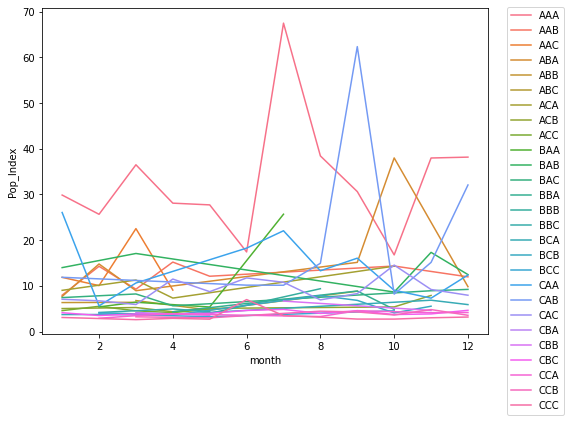

In [41]:
plt.figure(figsize=(8,6))
_=sns.lineplot(data=df_ABC_metric_quarter
            , x="month",
             y="Pop_Index",
             hue = "CLASS")

_=plt.legend(bbox_to_anchor = (1.03, 1.02), fontsize = 10)

In [30]:
# sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
# , x="month", y="Pop_Index",color='green').set(title='Popularity index for products of class A-A-A')

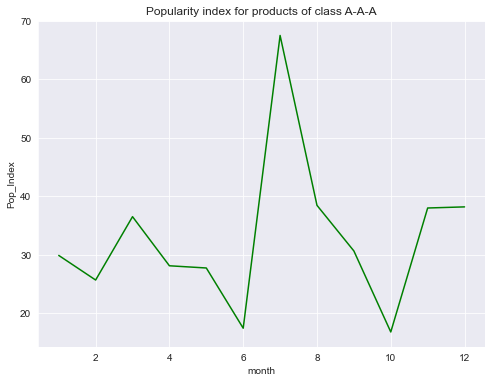

In [42]:
plt.figure(figsize=(8,6))



sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
            , x="month", y="Pop_Index",color='green').set(title='Popularity index for products of class A-A-A')

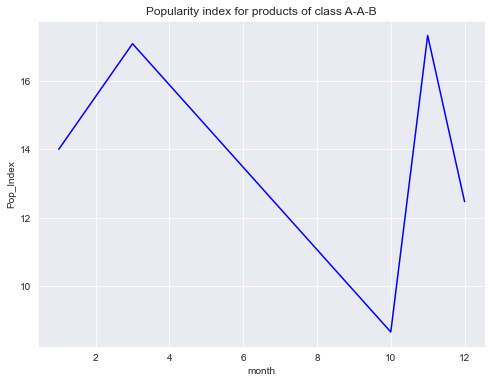

In [43]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "B")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "B")]
            , x="month", y="Pop_Index",color='blue').set(title='Popularity index for products of class A-A-B')

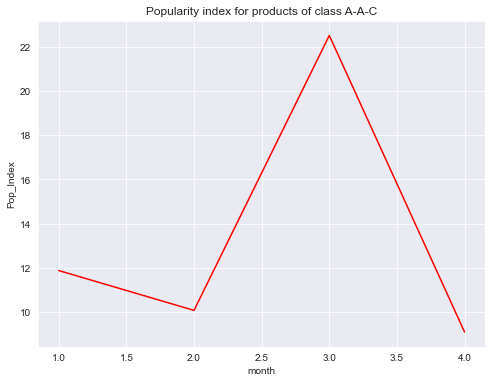

In [44]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "C")]
            , x="month", y="Pop_Index",color='red').set(title='Popularity index for products of class A-A-C')


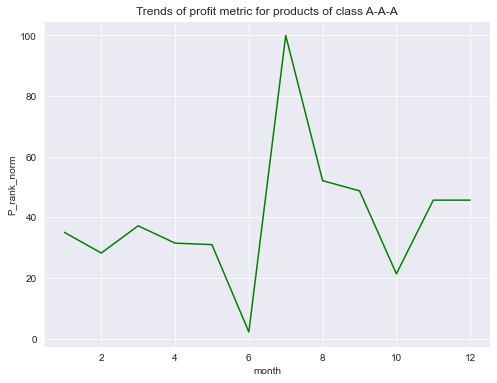

In [45]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
            , x="month", y="P_rank_norm",color='green').set(title='Trends of profit metric for products of class A-A-A')


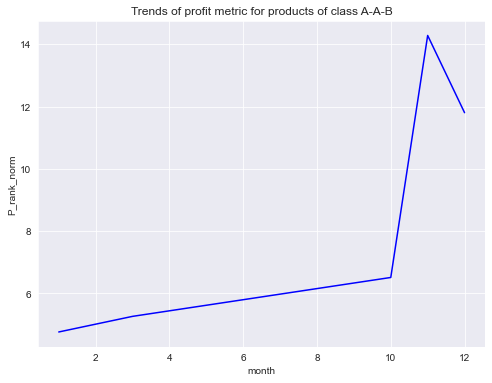

In [46]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "B")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "B")]
            , x="month", y="P_rank_norm",color='blue').set(title='Trends of profit metric for products of class A-A-B')


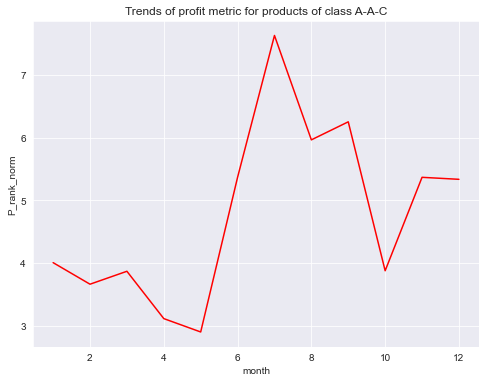

In [47]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "C")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "C")]
            , x="month", y="P_rank_norm",color='red').set(title='Trends of profit metric for products of class A-A-C')


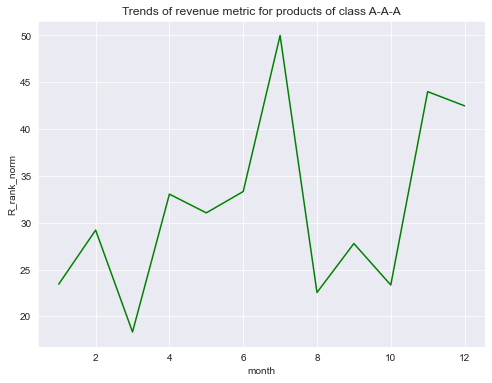

In [48]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "A")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "A")]
            , x="month", y="R_rank_norm",color='green').set(title='Trends of revenue metric for products of class A-A-A')


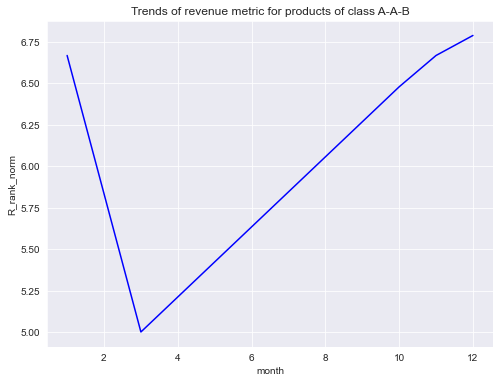

In [49]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "B")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "B")]
            , x="month", y="R_rank_norm",color='blue').set(title='Trends of revenue metric for products of class A-A-B')


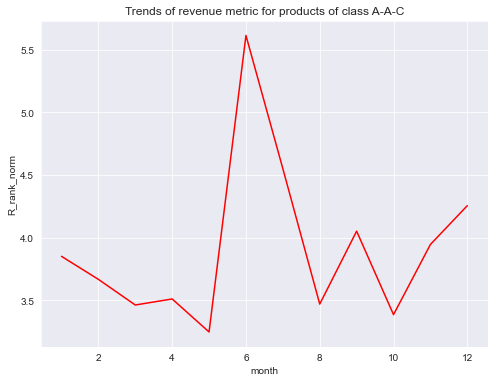

In [50]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_ABC_metric_quarter[(df_ABC_metric_quarter["class_profit"]== "C")& (df_ABC_metric_quarter["class_quantity"]== "A")& (df_ABC_metric_quarter["class_revenue"]== "C")]
            , x="month", y="R_rank_norm",color='red').set(title='Trends of revenue metric for products of class A-A-C')


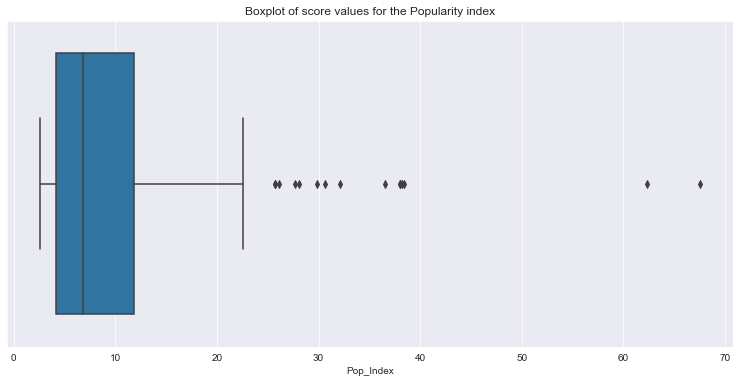

In [51]:
#Pop_Index's boxplot
plt.figure(figsize=(13,6))
sns.set_style("darkgrid")
_=sns.boxplot(data=df_ABC_metric_quarter, x='Pop_Index').set(title='Boxplot of score values for the Popularity index')

In [52]:
df_ABC_metric_quarter

,class_profit,class_quantity,class_revenue,month,product_id,total_stock,quantity,revenue,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index,CLASS
0,A,A,A,1,7,16932,344,3206752.0,35.056689,23.441558,27.392752,29.877570,AAA
1,A,A,A,2,9,61079,357,4055099.5,28.214286,29.210481,23.886206,25.667248,AAA
2,A,A,A,3,5,40681,598,3110419.0,37.205128,18.333333,37.611111,36.505128,AAA
3,A,A,A,4,8,35518,582,7295805.0,31.493056,33.055556,25.715453,28.104619,AAA
4,A,A,A,5,9,25624,280,4176545.5,30.992063,31.054193,25.546059,27.727567,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,C,C,C,8,13,44308,62,394530.0,4.135006,3.020418,2.610205,3.164396,CCC
153,C,C,C,9,16,8769,59,279994.0,2.871854,2.707630,2.658016,2.735340,CCC
154,C,C,C,10,9,51250,36,157238.0,2.830406,2.819298,2.664248,2.730156,CCC
155,C,C,C,11,11,13374,100,531739.0,3.380599,3.092029,2.804657,3.020605,CCC


In [53]:

df_ABC_metric_quarter.groupby("CLASS").sum()


,month,product_id,total_stock,quantity,revenue,P_rank_norm,R_rank_norm,Q_rank_norm,Pop_Index
CLASS,,,,,,,,,
AAA,78,65,340962,3965,55866401.0,478.668015,378.591926,347.291024,394.838016
AAB,37,18,103881,703,2302853.5,68.221557,42.423060,98.622291,85.172072
AAC,10,8,66324,389,616434.5,27.203069,17.475220,71.908069,53.539676
ABA,37,6,15029,124,2287752.0,212.500000,80.238095,26.706222,94.410638
ABB,4,2,58463,53,323736.5,19.090909,12.132353,9.109731,12.754274
ABC,17,3,10995,50,226177.0,35.416667,13.401709,12.095312,20.323106
ACA,18,7,14930,109,2809459.0,90.251323,49.641053,13.140325,41.954211
ACB,34,7,15347,75,978180.0,57.199883,37.960165,18.500043,33.017993
ACC,15,6,15749,73,506788.0,36.395315,23.415867,16.258558,23.664288


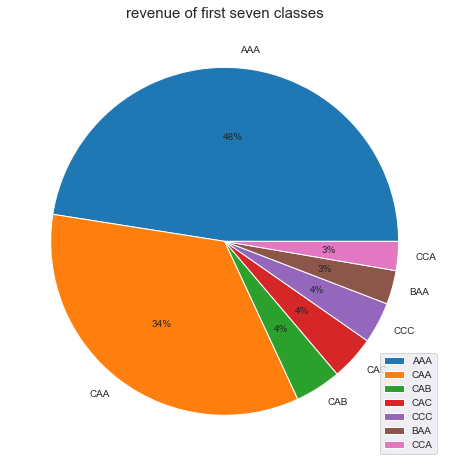

In [54]:
plt.figure(figsize=(10,8))

pie = df_ABC_metric_quarter.groupby("CLASS").sum()["revenue"].reset_index().sort_values("revenue",ascending=False)[0:7]
plt.pie(pie["revenue"],labels=pie["CLASS"], autopct='%.0f%%')
plt.title('revenue of first seven classes',fontsize='15')
plt.legend()

plt.show()

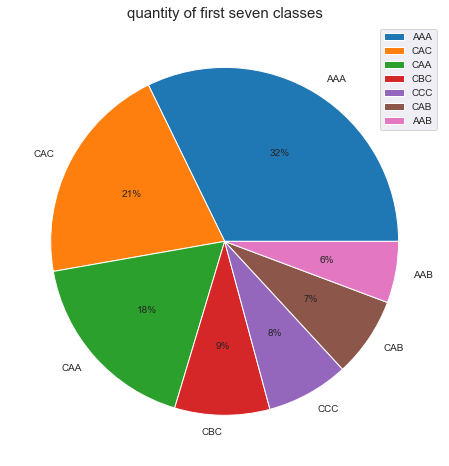

In [55]:
plt.figure(figsize=(10,8))

pie = df_ABC_metric_quarter.groupby("CLASS").sum()["quantity"].reset_index().sort_values("quantity",ascending=False)[0:7]
plt.pie(pie["quantity"],labels=pie["CLASS"], autopct='%.0f%%')
plt.title('quantity of first seven classes',fontsize='15')
plt.legend()

plt.show()